In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

import json, pickle
from tqdm import tqdm
import sys, os, pdb
import pandas as pd

# from src.data import ECoG_Data
# from src.fold_data import Fold_Data_Container
import src.manifold_u as mu
import importlib
importlib.reload(mu)

import fig_utils as figu

plt.style.use(['science', 'retro'])
sns.set_style("ticks")

In [2]:
movement_colors, day_colors, participant_colors, exp_class_colors, exp_participant_colors, freq_colors = mu.get_all_colors()

## Naturalistic Data First

In [3]:
filepath = '/home/zsteineh/research_projects/NaturalisticNeuralManifolds/experiment_params/'
file_name = 'exp_params_nat_pca.json'
try:
    json_filename = filepath + file_name
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <json file of experiment parameters>")
with open(json_filename) as f:
    exp_params = json.load(f)
print(exp_params['comment'])

Param file for running PCA pipeline on naturalistic data


In [4]:
freq_bands = exp_params["freq_bands"]
class_dict = exp_params["class_dict"]
class_dict = {int(cur_key): val for cur_key, val in class_dict.items()}
class_color = exp_params["class_color"]
class_color = {int(cur_key): val for cur_key, val in class_color.items()}

proj_mat_sp = exp_params["sp"] + exp_params["dataset"] + exp_params["experiment_folder"]

percent_threshold = 0.8
pats_ids_in = exp_params["pats_ids_in"]
days_tested = exp_params["test_day"]

In [5]:
all_sbjs_pca = []
for f, freq in enumerate(freq_bands):
    cur_pca = np.load(proj_mat_sp + freq + '_pca_objects.npy', allow_pickle=True)
    all_sbjs_pca.append(cur_pca)
all_sbjs_pca = np.array(all_sbjs_pca)
print(all_sbjs_pca.shape)

pca_manifolds_VAF = mu.extract_explained_var(
    class_dict, freq_bands, pats_ids_in, all_sbjs_pca
)
# remove rest data
pca_manifolds_VAF = pca_manifolds_VAF[:, :, :, 1:, :]
print(pca_manifolds_VAF.shape)

# get the mean and std of the VAF for each freq band
pca_manifolds_VAF_mean = np.nanmean(pca_manifolds_VAF, axis=(1,2,3))
print(pca_manifolds_VAF_mean.shape)
pca_manifolds_VAF_std = np.nanstd(pca_manifolds_VAF, axis=(1,2,3))
print(pca_manifolds_VAF_std.shape)

(6, 12, 5, 5)
(6, 12, 5, 4, 311)
(6, 311)
(6, 311)


### Cross Movements

In [6]:
cross_move_pas = pickle.load(open(proj_mat_sp + 'freq_cross_move_pas.pkl', 'rb'))
print(cross_move_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [7]:
cross_move_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_move_nd_df.csv')
cross_move_nd_df

,Unnamed: 0,Frequency,Participant,Day,Movement Comparison,Neural Dissimilarity
0,0,LFO,P01,3,left vs down,0.090310
1,1,LFO,P01,3,left vs right,NaN
2,2,LFO,P01,3,left vs up,NaN
3,3,LFO,P01,3,down vs right,NaN
4,4,LFO,P01,3,down vs up,NaN
...,...,...,...,...,...,...
434155,72355,High Gamma,Null,Null,left vs right,0.811131
434156,72356,High Gamma,Null,Null,left vs up,0.800772
434157,72357,High Gamma,Null,Null,down vs right,0.812984
434158,72358,High Gamma,Null,Null,down vs up,0.800042


### Cross Days

In [8]:
cross_day_pas = pickle.load(open(proj_mat_sp + 'freq_cross_day_pas.pkl', 'rb'))
print(cross_day_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [9]:
cross_day_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_day_nd_df.csv')
cross_day_nd_df

,Unnamed: 0,Frequency,Participant,Movement,Day Comparison,Neural Dissimilarity
0,0,LFO,P01,left,3 vs 4,0.201919
1,1,LFO,P01,left,3 vs 5,0.208934
2,2,LFO,P01,left,3 vs 6,0.176227
3,3,LFO,P01,left,3 vs 7,0.174874
4,4,LFO,P01,left,4 vs 5,0.140010
...,...,...,...,...,...,...
1670875,475,High Gamma,P12,up,4 vs 6,0.066172
1670876,476,High Gamma,P12,up,4 vs 7,0.063321
1670877,477,High Gamma,P12,up,5 vs 6,0.114093
1670878,478,High Gamma,P12,up,5 vs 7,0.084176


### Cross Participants

In [10]:
cross_pat_pas = pickle.load(open(proj_mat_sp + 'freq_cross_pat_pas.pkl', 'rb'))
print(cross_pat_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [11]:
cross_pat_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_pat_nd_df.csv')
cross_pat_nd_df

,Unnamed: 0,Frequency,Movement,Participant Comparison,First Participant Day,Second Participant Day,Electrode Overlap,Neural Dissimilarity
0,0,LFO,left,P01 vs P02,3,3,0.438662,0.523129
1,1,LFO,left,P01 vs P02,3,4,0.438662,0.532533
2,2,LFO,left,P01 vs P02,3,5,0.438662,0.555758
3,3,LFO,left,P01 vs P02,3,6,0.438662,0.526076
4,4,LFO,left,P01 vs P02,3,7,0.438662,NaN
...,...,...,...,...,...,...,...,...
303595,6595,High Gamma,up,P11 vs P12,7,3,0.473318,0.369424
303596,6596,High Gamma,up,P11 vs P12,7,4,0.473318,0.354147
303597,6597,High Gamma,up,P11 vs P12,7,5,0.473318,0.358674
303598,6598,High Gamma,up,P11 vs P12,7,6,0.473318,0.379278


### Make the figure

0.746
0.712
0.778


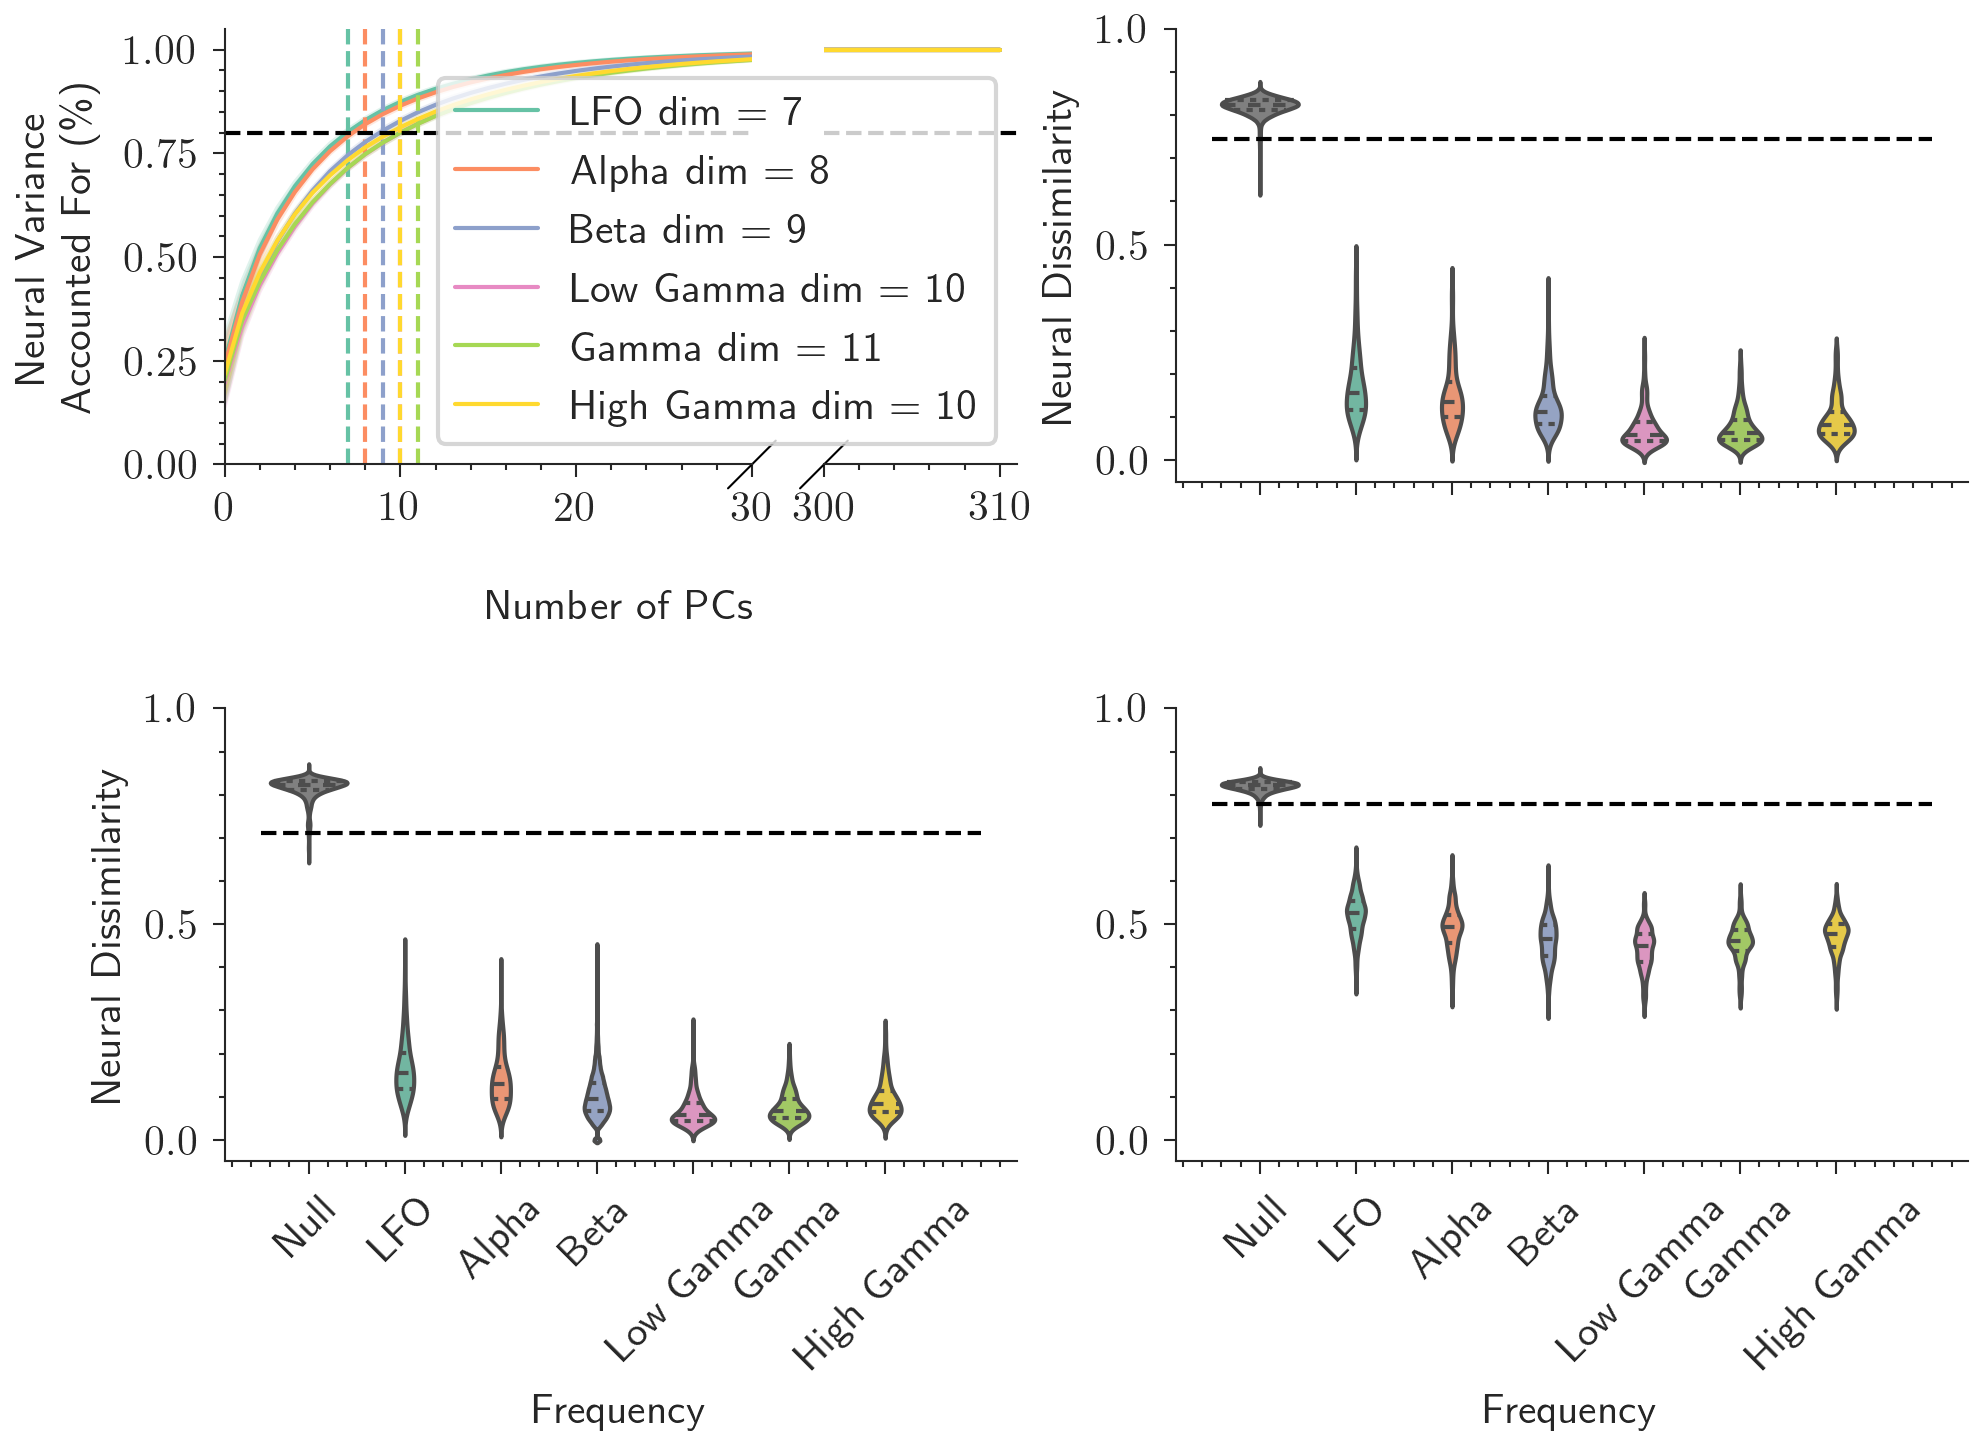

In [12]:
wspace = 0.2
hspace = 0.5
fig, orig_axes = plt.subplots(2, 2, figsize=(7.5, 5), dpi = 300)
plt.rcParams.update({"font.size": 10})
plt.subplots_adjust(wspace=wspace, hspace=hspace)
orig_axes[0,0].axis('off')
sns.despine()
# plt.tight_layout()

axes = GridSpec(2,2, figure=fig, wspace=wspace, hspace=hspace+0.1)

figu.subplot_VAF(pca_manifolds_VAF_mean, 
            pca_manifolds_VAF_std, 
            list(freq_bands.keys()), 
            "", 
            freq_colors, 
            axes[0,0],
            legend_loc=None)

order = ["Null"]
order.extend(freq_bands.keys())
null_inds = cross_move_nd_df[cross_move_nd_df["Participant"] == "Null"].index
cross_move_nd_df.loc[null_inds, "Frequency"] = "Null"
sigf_val = mu.calc_sumed_significance(cross_move_nd_df)
print(np.round(sigf_val, 3))
figu.plot_neural_dissimilarity(orig_axes[0,1], 
                          cross_move_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency", )
orig_axes[0,1].set_xticklabels([])
orig_axes[0,1].set_xlabel('')
orig_axes[0,1].set_yticks([0, 0.5, 1])

sigf_val = mu.calc_sumed_significance(cross_day_nd_df)
print(np.round(sigf_val, 3))
figu.plot_neural_dissimilarity(orig_axes[1,0], 
                          cross_day_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency",)
orig_axes[1,0].set_yticks([0, 0.5, 1])

sigf_val = mu.calc_sumed_significance(cross_pat_nd_df , null_col='Movement')
print(np.round(sigf_val, 3))
figu.plot_neural_dissimilarity(orig_axes[1,1], 
                          cross_pat_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency",)
orig_axes[1,1].set_yticks([0, 0.5, 1])
orig_axes[1,1].set_ylabel('')

plt.savefig('/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/saved_figures/supplement_nat_freq.svg', bbox_inches='tight', format='svg')
plt.show()

In [13]:
print("CROSS MOVEMENT STATS")
print("All Freqs")
print("mean:", np.round(cross_move_nd_df[cross_move_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].mean(), 3))
print("std:", np.round(cross_move_nd_df[cross_move_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].std(), 3))
print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", np.round(cross_move_nd_df[cross_move_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean(), 3))
    print("std:", np.round(cross_move_nd_df[cross_move_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std(), 3))
    print()

CROSS MOVEMENT STATS
All Freqs
mean: 0.116
std: 0.069

LFO
mean: 0.173
std: 0.078

Alpha
mean: 0.151
std: 0.072

Beta
mean: 0.127
std: 0.06

Low Gamma
mean: 0.074
std: 0.042

Gamma
mean: 0.076
std: 0.04

High Gamma
mean: 0.095
std: 0.047



In [14]:
print("CROSS DAY STATS")
print("All Freqs")
print("mean:", np.round(np.nanmean(cross_day_nd_df[cross_day_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].values), 3))
print("std:", np.round(np.nanstd(cross_day_nd_df[cross_day_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].values), 3))

print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", np.round(cross_day_nd_df[cross_day_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean(), 3))
    print("std:", np.round(cross_day_nd_df[cross_day_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std(), 3))
    print()

CROSS DAY STATS
All Freqs
mean: 0.103
std: 0.053

LFO


mean: 0.166
std: 0.067

Alpha
mean: 0.141
std: 0.061

Beta
mean: 0.103
std: 0.053

Low Gamma
mean: 0.069
std: 0.036

Gamma
mean: 0.075
std: 0.034

High Gamma
mean: 0.094
std: 0.042



In [15]:
print("CROSS PAT STATS")
print("All Freqs")
print("mean:", np.round(cross_pat_nd_df[cross_pat_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].mean(), 3))
print("std:", np.round(cross_pat_nd_df[cross_pat_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].std(), 3))
print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", np.round(cross_pat_nd_df[cross_pat_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean(), 3))
    print("std:", np.round(cross_pat_nd_df[cross_pat_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std(), 3))
    print()

CROSS PAT STATS
All Freqs
mean: 0.474
std: 0.054

LFO
mean: 0.521
std: 0.049

Alpha
mean: 0.489
std: 0.05

Beta
mean: 0.462
std: 0.05

Low Gamma
mean: 0.443
std: 0.047

Gamma
mean: 0.458
std: 0.042

High Gamma
mean: 0.471
std: 0.044



# Experimental Data

In [16]:
filepath = '/home/zsteineh/research_projects/NaturalisticNeuralManifolds/experiment_params/'
file_name = 'exp_params_exp_pca.json'
try:
    json_filename = filepath + file_name
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <json file of experiment parameters>")
with open(json_filename) as f:
    exp_params = json.load(f)
print(exp_params['comment'])

Param file for running PCA pipeline on experimental data


In [17]:
freq_bands = exp_params["freq_bands"]
class_dict = exp_params["class_dict"]
class_dict = {int(cur_key): val for cur_key, val in class_dict.items()}
class_dict = {key - 1: val for key, val in class_dict.items()}
class_color = exp_params["class_color"]
class_color = {int(cur_key): val for cur_key, val in class_color.items()}

proj_mat_sp = exp_params["sp"] + exp_params["dataset"] + exp_params["experiment_folder"]

percent_threshold = 0.8
pats_ids_in = exp_params["pats_ids_in"]

In [18]:
all_sbjs_pca = []
for f, freq in enumerate(freq_bands):
    cur_pca = np.load(proj_mat_sp + freq + '_pca_objects.npy', allow_pickle=True)
    all_sbjs_pca.append(cur_pca)
all_sbjs_pca = np.array(all_sbjs_pca)
print(all_sbjs_pca.shape)

pca_manifolds_VAF = mu.extract_explained_var(
    class_dict, freq_bands, pats_ids_in, all_sbjs_pca
)
# remove rest data
pca_manifolds_VAF = pca_manifolds_VAF[:, :, :, 1:, :]
print(pca_manifolds_VAF.shape)

# get the mean and std of the VAF for each freq band
pca_manifolds_VAF_mean = np.nanmean(pca_manifolds_VAF, axis=(1,2,3))
print(pca_manifolds_VAF_mean.shape)
pca_manifolds_VAF_std = np.nanstd(pca_manifolds_VAF, axis=(1,2,3))
print(pca_manifolds_VAF_std.shape)

(6, 5, 1, 5)
(6, 5, 1, 4, 311)
(6, 311)
(6, 311)


### Cross Movement

In [19]:
cross_move_pas = pickle.load(open(proj_mat_sp + 'freq_cross_move_pas.pkl', 'rb'))
print(cross_move_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [20]:
cross_move_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_move_nd_df.csv')
cross_move_nd_df

,Unnamed: 0,Frequency,Participant,Day,Movement Comparison,Neural Dissimilarity
0,0,LFO,E01,all,Thumb vs Index,0.125580
1,1,LFO,E01,all,Thumb vs Middle,0.094602
2,2,LFO,E01,all,Thumb vs Ring,0.127995
3,3,LFO,E01,all,Thumb vs Pinky,0.168099
4,4,LFO,E01,all,Index vs Middle,0.126452
...,...,...,...,...,...,...
300295,50045,High Gamma,Null,Null,Index vs Ring,0.819478
300296,50046,High Gamma,Null,Null,Index vs Pinky,0.810512
300297,50047,High Gamma,Null,Null,Middle vs Ring,0.828314
300298,50048,High Gamma,Null,Null,Middle vs Pinky,0.810416


### Cross Participant

In [21]:
cross_pat_pas = pickle.load(open(proj_mat_sp + 'freq_cross_pat_pas.pkl', 'rb'))
print(cross_pat_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [22]:
cross_pat_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_pat_nd_df.csv')
cross_pat_nd_df

,Unnamed: 0,Frequency,Movement,Participant Comparison,First Participant Day,Second Participant Day,Electrode Overlap,Neural Dissimilarity
0,0,LFO,Thumb,E01 vs E02,all,all,0.562753,0.441023
1,1,LFO,Thumb,E01 vs E03,all,all,0.736842,0.442053
2,2,LFO,Thumb,E01 vs E04,all,all,0.573123,0.506292
3,3,LFO,Thumb,E01 vs E05,all,all,0.510823,0.537632
4,4,LFO,Thumb,E02 vs E03,all,all,0.884211,0.373387
...,...,...,...,...,...,...,...,...
50295,45,High Gamma,Pinky,E02 vs E04,all,all,0.806324,0.379968
50296,46,High Gamma,Pinky,E02 vs E05,all,all,0.826840,0.373320
50297,47,High Gamma,Pinky,E03 vs E04,all,all,0.660079,0.417805
50298,48,High Gamma,Pinky,E03 vs E05,all,all,0.597403,0.434713


0.714
0.718


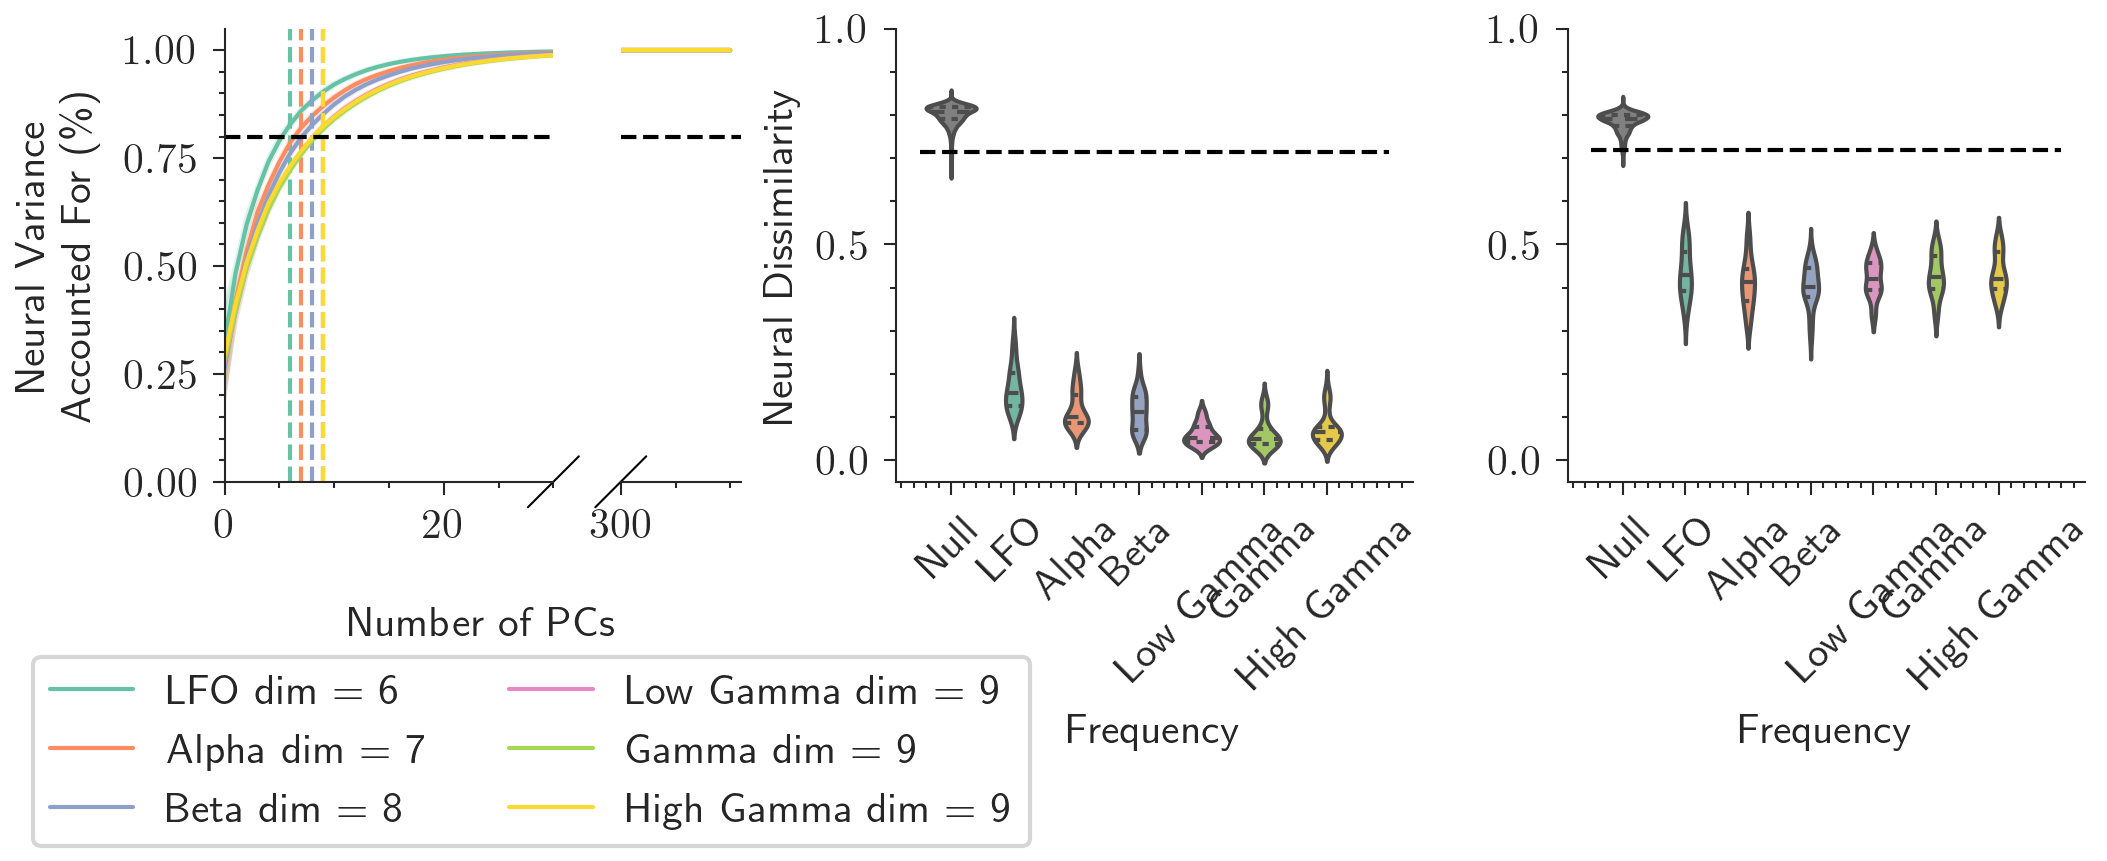

In [23]:
wspace = 0.3
fig, orig_axes = plt.subplots(1, 3, figsize=(8, 2), dpi=300)
plt.subplots_adjust(wspace=wspace, hspace=hspace)
orig_axes[0].axis('off')
sns.despine()
# plt.tight_layout()

axes = GridSpec(1, 3, figure=fig, wspace=wspace, hspace=hspace+0.1)
# axes.update(wspace=0.15, hspace=0.9)

figu.subplot_VAF(pca_manifolds_VAF_mean, 
            pca_manifolds_VAF_std, 
            list(freq_bands.keys()), 
            "A) Experimental Frequency\nBands", 
            freq_colors, 
            axes[0])

order = ["Null"]
order.extend(freq_bands.keys())
null_inds = cross_move_nd_df[cross_move_nd_df["Participant"] == "Null"].index
cross_move_nd_df.loc[null_inds, "Frequency"] = "Null"
sigf_val = mu.calc_sumed_significance(cross_move_nd_df)
print(np.round(sigf_val, 3))
figu.plot_neural_dissimilarity(orig_axes[1], 
                          cross_move_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency",)
orig_axes[1].set_yticks([0, 0.5, 1])
# orig_axes[1].set_title('B) Cross Movement', loc = 'left', y = 0.99)

sigf_val = mu.calc_sumed_significance(cross_pat_nd_df, null_col='Movement')
print(np.round(sigf_val, 3))
figu.plot_neural_dissimilarity(orig_axes[2], 
                          cross_pat_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency")
# orig_axes[2].set_yticklabels([])
orig_axes[2].set_yticks([0, 0.5, 1])
orig_axes[2].set_ylabel('')
# orig_axes[2].set_title('C) Cross Subject', loc = 'left', y = 0.99)

plt.savefig('/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/saved_figures/supplement_exp_freq.svg', bbox_inches='tight', format='svg')
plt.show()

In [24]:
print("CROSS MOVEMENT STATS")
print("All Freqs")
print("mean:", np.round(cross_move_nd_df[cross_move_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].mean(), 3))
print("std:", np.round(cross_move_nd_df[cross_move_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].std(), 3))
print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", np.round(cross_move_nd_df[cross_move_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean(), 3))
    print("std:", np.round(cross_move_nd_df[cross_move_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std(), 3))
    print()

CROSS MOVEMENT STATS
All Freqs
mean: 0.098
std: 0.054

LFO
mean: 0.164
std: 0.049

Alpha
mean: 0.117
std: 0.041

Beta
mean: 0.114
std: 0.043

Low Gamma
mean: 0.06
std: 0.024

Gamma
mean: 0.061
std: 0.034

High Gamma
mean: 0.074
std: 0.037



In [25]:
print("CROSS PAT STATS")
print("All Freqs")
print("mean:", np.round(cross_pat_nd_df[cross_pat_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].mean(), 3))
print("std:", np.round(cross_pat_nd_df[cross_pat_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].std(), 3))
print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", np.round(cross_pat_nd_df[cross_pat_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean(), 3))
    print("std:", np.round(cross_pat_nd_df[cross_pat_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std(), 3))
    print()

CROSS PAT STATS
All Freqs
mean: 0.421
std: 0.051

LFO
mean: 0.434
std: 0.058

Alpha
mean: 0.408
std: 0.056

Beta
mean: 0.405
std: 0.048

Low Gamma
mean: 0.42
std: 0.042

Gamma
mean: 0.428
std: 0.048

High Gamma
mean: 0.432
std: 0.048

